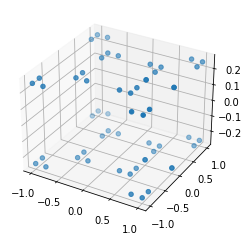

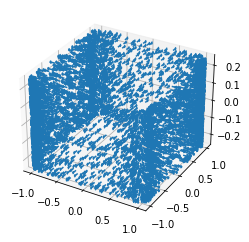

In [1]:

import numpy as np
import jax
import jax.numpy as jnp
from jax.example_libraries import stax, optimizers
import matplotlib.pyplot as plt
import pinns 
import datetime
import jax.scipy.optimize
import jax.flatten_util
import scipy
import scipy.optimize

from jax.config import config
config.update("jax_enable_x64", True)

R = 0.5
re = 0.2
h = R
knots2d = np.array([ [[1-R,0],[1,0]] , [[1-R,1-R-re],[1,1-re]] , [[1-R,1-R],[1,1]] , [[1-R-re,1-R],[1-re,1]] , [[-1+R+re,1-R],[-1+re,1]] , [[-1+R,1-R],[-1,1]] , [[-1+R,1-R-re],[-1,1-re]] , [[-1+R,-1+R+re],[-1,-1+re]] , [[-1+R,-1+R],[-1,-1]] , [[-1+R+re,-1+R],[-1+re,-1]] , [[1-R-re,-1+R],[1-re,-1]] , [[1-R,-1+R],[1,-1]] , [[1-R,-1+R+re],[1,-1+re]] , [[1-R,0],[1,0]] ])
knots2d = np.pad(knots2d,((0,0),(0,0),(0,1)))
knots = np.concatenate((knots2d[None,...],knots2d[None,...]),0)
knots[0,:,:,2] = h/2
knots[1,:,:,2] = -h/2
knots = knots[:,:,::-1,:]

weights2d = np.ones([knots2d.shape[0],knots2d.shape[1]])
weights2d[2,:] = 1/np.sqrt(2)
weights2d[5,:] = 1/np.sqrt(2)
weights2d[8,:] = 1/np.sqrt(2)
weights2d[11,:] = 1/np.sqrt(2)
weights = np.concatenate((weights2d[None,...],weights2d[None,...]),0)

basis2 = pinns.bspline.BSplineBasis(np.linspace(0,1,13),2)
basis1 = pinns.bspline.BSplineBasis(np.linspace(0,1,2),1)
basis3 = pinns.bspline.BSplineBasis(np.linspace(0,1,2),1)

geom = pinns.geometry.PatchNURBS([basis1, basis2, basis3], knots, weights, None)


fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(knots[...,0].flatten(), knots[...,1].flatten(), knots[...,2].flatten())
 
x_in = geom.sample_inside(6000)
x_bd1,_ = geom.sample_boundary(0,0,5000)
x_bd2,_ = geom.sample_boundary(0,1,5000)
x_bd3,x_bdt3 = geom.sample_boundary(2,0,5000)
x_bd4,x_bdt4 = geom.sample_boundary(2,1,5000)
x_bdn3 = pinns.geometry.tangent2normal_3d(x_bdt3)

fig = plt.figure()
ax = plt.axes(projection ="3d")
# ax.scatter3D(x_in[...,0].flatten(), x_in[...,1].flatten(), x_in[...,2].flatten(),s=2)
# ax.scatter3D(x_bd1[...,0].flatten(), x_bd1[...,1].flatten(), x_bd1[...,2].flatten(),s=2, c='r')
# ax.scatter3D(x_bd2[...,0].flatten(), x_bd2[...,1].flatten(), x_bd2[...,2].flatten(),s=2, c='g')
# ax.scatter3D(x_bd3[...,0].flatten(), x_bd3[...,1].flatten(), x_bd3[...,2].flatten(),s=2, c='b')
# ax.scatter3D(x_bd4[...,0].flatten(), x_bd4[...,1].flatten(), x_bd4[...,2].flatten(),s=2, c='y')
ax.quiver(x_bd3[...,0].flatten(), x_bd3[...,1].flatten(), x_bd3[...,2].flatten(),x_bdn3[...,0].flatten(), x_bdn3[...,1].flatten(), x_bdn3[...,2].flatten(),length = 0.1, normalize = True)
# plt.savefig('3dplot.jpg')
